In [1]:
!pip install git+https://github.com/ultralytics/ultralytics.git
!pip install matplotlib
!pip install roboflow

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-5rxavalc
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-5rxavalc
  Resolved https://github.com/ultralytics/ultralytics.git to commit 6c65d756e4886828ac4060472348a49668a9fc3e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.49-py3-none-any.whl size=898708 sha256=e78c0e0af075cd953d582aa8ee094a6fbb6e9dae07127803f122fbc0098cd6df
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfz_yz_m/wheels/45/25/b9/9f1e3857f58c296e7854ef871c3f5a15d519cc6c679848df8e
Successfully built ultralytics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: i

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=predict model=yolov8x.pt

100% 131M/131M [00:01<00:00, 121MB/s]
WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 105.8ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 56.3ms
Speed: 6.0ms preprocess, 81.1ms inference, 446.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_640.jpg'

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

100% 42.8k/42.8k [00:00<00:00, 14.8MB/s]
image 1/1 /content/pets-3715733_640.jpg: 448x640 3 cats, 2 dogs, 120.5ms
Speed: 2.8ms preprocess, 120.5ms inference, 1476.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


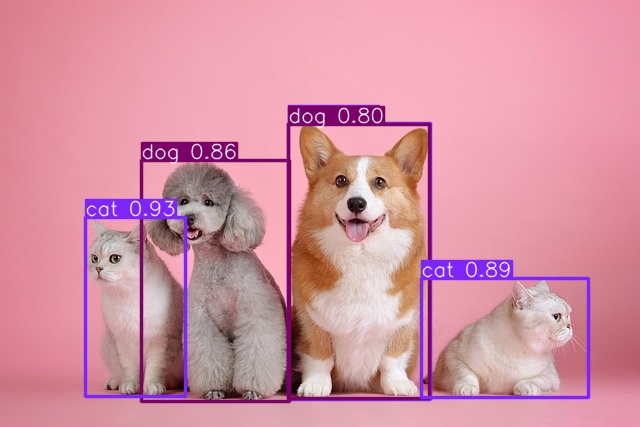

In [4]:
Image(filename='/content/runs/detect/predict2/pets-3715733_640.jpg', height=300)

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="6WcrWjJhUITrKvaEOnR2")
project = rf.workspace("lpr-bygdn").project("lpr-fuskc")
version = project.version(18)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LPR-18 in yolov8:: 100%|██████████| 4012/4012 [00:01<00:00, 3993.68it/s]


In [6]:
print(dataset.location)
print(f'{dataset.location}/data.yaml')

/content/LPR-18
/content/LPR-18/data.yaml


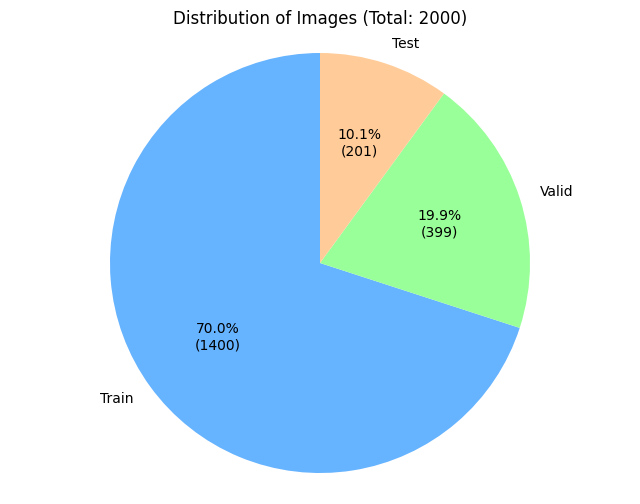

In [7]:
import matplotlib.pyplot as plt

# Define paths to the folders
train_folder = os.path.join(dataset.location, 'train/images')
valid_folder = os.path.join(dataset.location, 'valid/images')
test_folder = os.path.join(dataset.location, 'test/images')

# Count images in each folder
train_count = len([f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))])
valid_count = len([f for f in os.listdir(valid_folder) if os.path.isfile(os.path.join(valid_folder, f))])
test_count = len([f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))])

# Data for the pie chart
labels = ['Train', 'Valid', 'Test']
sizes = [train_count, valid_count, test_count]
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Calculate total number of images
total_images = sum(sizes)

# Create a function to format the labels with count and percentage
def format_label(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: format_label(pct, sizes), startangle=90)
plt.title(f'Distribution of Images (Total: {total_images})')
plt.axis('equal')

plt.show()

In [9]:
from PIL import Image

def get_image_dimensions(image_path):
  with Image.open(image_path) as img:
    width, height = img.size
  return width, height


image_folder = '/content/LPR-18/train/images'

for filename in os.listdir(image_folder):
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(image_folder, filename)
    width, height = get_image_dimensions(image_path)
    print(f"Image: {filename}, Dimensions: {width}x{height}")

Image: 1423_jpg.rf.14aa1c65b3f3ccbbcf52b59dc535e349.jpg, Dimensions: 1080x1080
Image: 1239_jpg.rf.8db22d7e803a084669bf14af6d5ee279.jpg, Dimensions: 1080x1080
Image: 1926_jpg.rf.2950219347fb8f2bb8e20636eedb2af5.jpg, Dimensions: 1080x1080
Image: 1113_jpg.rf.4596e0b277065f7ee3f28f02fdb1b14b.jpg, Dimensions: 1080x1080
Image: 1659_jpg.rf.003cf0626b584b41113e8e95f681e8c0.jpg, Dimensions: 1080x1080
Image: 1611_jpg.rf.434f7c45f4ea13508b11eb53dce65e2f.jpg, Dimensions: 1080x1080
Image: 1262_jpg.rf.009f0ebf990bb5bc5e44699d3109d1ea.jpg, Dimensions: 1080x1080
Image: 1191_jpg.rf.8abb8f9ed9b62865ccfc09fe8527f983.jpg, Dimensions: 1080x1080
Image: 0638_jpg.rf.2a58498ec3ccb18e0fea8629c99ce2d3.jpg, Dimensions: 1080x1080
Image: 0319_jpg.rf.12a9559577364ed6ab5b16fdf7f6853a.jpg, Dimensions: 1080x1080
Image: 1341_jpg.rf.0d9af4bb01b61f276219680fee43639b.jpg, Dimensions: 1080x1080
Image: 0944_jpg.rf.16c19d6ee9df916193555a839c7d1d4b.jpg, Dimensions: 1080x1080
Image: 1363_jpg.rf.d32800a4467ec4bdb32e87682b279f5d.

In [15]:
def check_image_dimensions(image_path, target_width=1080, target_height=1080):
  if not os.path.isfile(image_path):
    return False
  with Image.open(image_path) as img:
    width, height = img.size
  return width == target_width and height == target_height

train_image_folder = '/content/LPR-18/train/images'
test_image_folder = '/content/LPR-18/test/images'
valid_image_folder = '/content/LPR-18/valid/images'

train_non_matching_images = []
test_non_matching_images = []
valid_non_matching_images = []

for filename in os.listdir(train_image_folder):
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(train_image_folder, filename)
    if not check_image_dimensions(image_path):
      train_non_matching_images.append(filename)

for filename in os.listdir(test_image_folder):
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(test_image_folder, filename)
    if not check_image_dimensions(image_path):
      test_non_matching_images.append(filename)

for filename in os.listdir(valid_image_folder):
  if filename.endswith(('.jpg', '.jpeg', '.png')):
    image_path = os.path.join(valid_image_folder, filename)
    if not check_image_dimensions(image_path):
      valid_non_matching_images.append(filename)

if train_non_matching_images:
  print("Images with dimensions other than 640x640:")
  for image_name in train_non_matching_images:
    print(len(image_name))
else:
  print("No images with dimensions other than 1080x1080 have been found in the train folder.")

if test_non_matching_images:
  print("Images with dimensions other than 1080x1080:")
  for image_name in test_non_matching_images:
    print(len(image_name))
else:
  print("No images with dimensions other than 1080x1080 have been found in the test folder.")

if valid_non_matching_images:
  print("Images with dimensions other than 1080x1080:")
  for image_name in valid_non_matching_images:
    print(len(image_name))
else:
  print("No images with dimensions other than 1080x1080 have been found in the validation folder.")

No images with dimensions other than 1080x1080 have been found in the train folder.
No images with dimensions other than 1080x1080 have been found in the test folder.
No images with dimensions other than 1080x1080 have been found in the validation folder.


In [17]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/LPR-18/data.yaml epochs=20

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/LPR-18/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

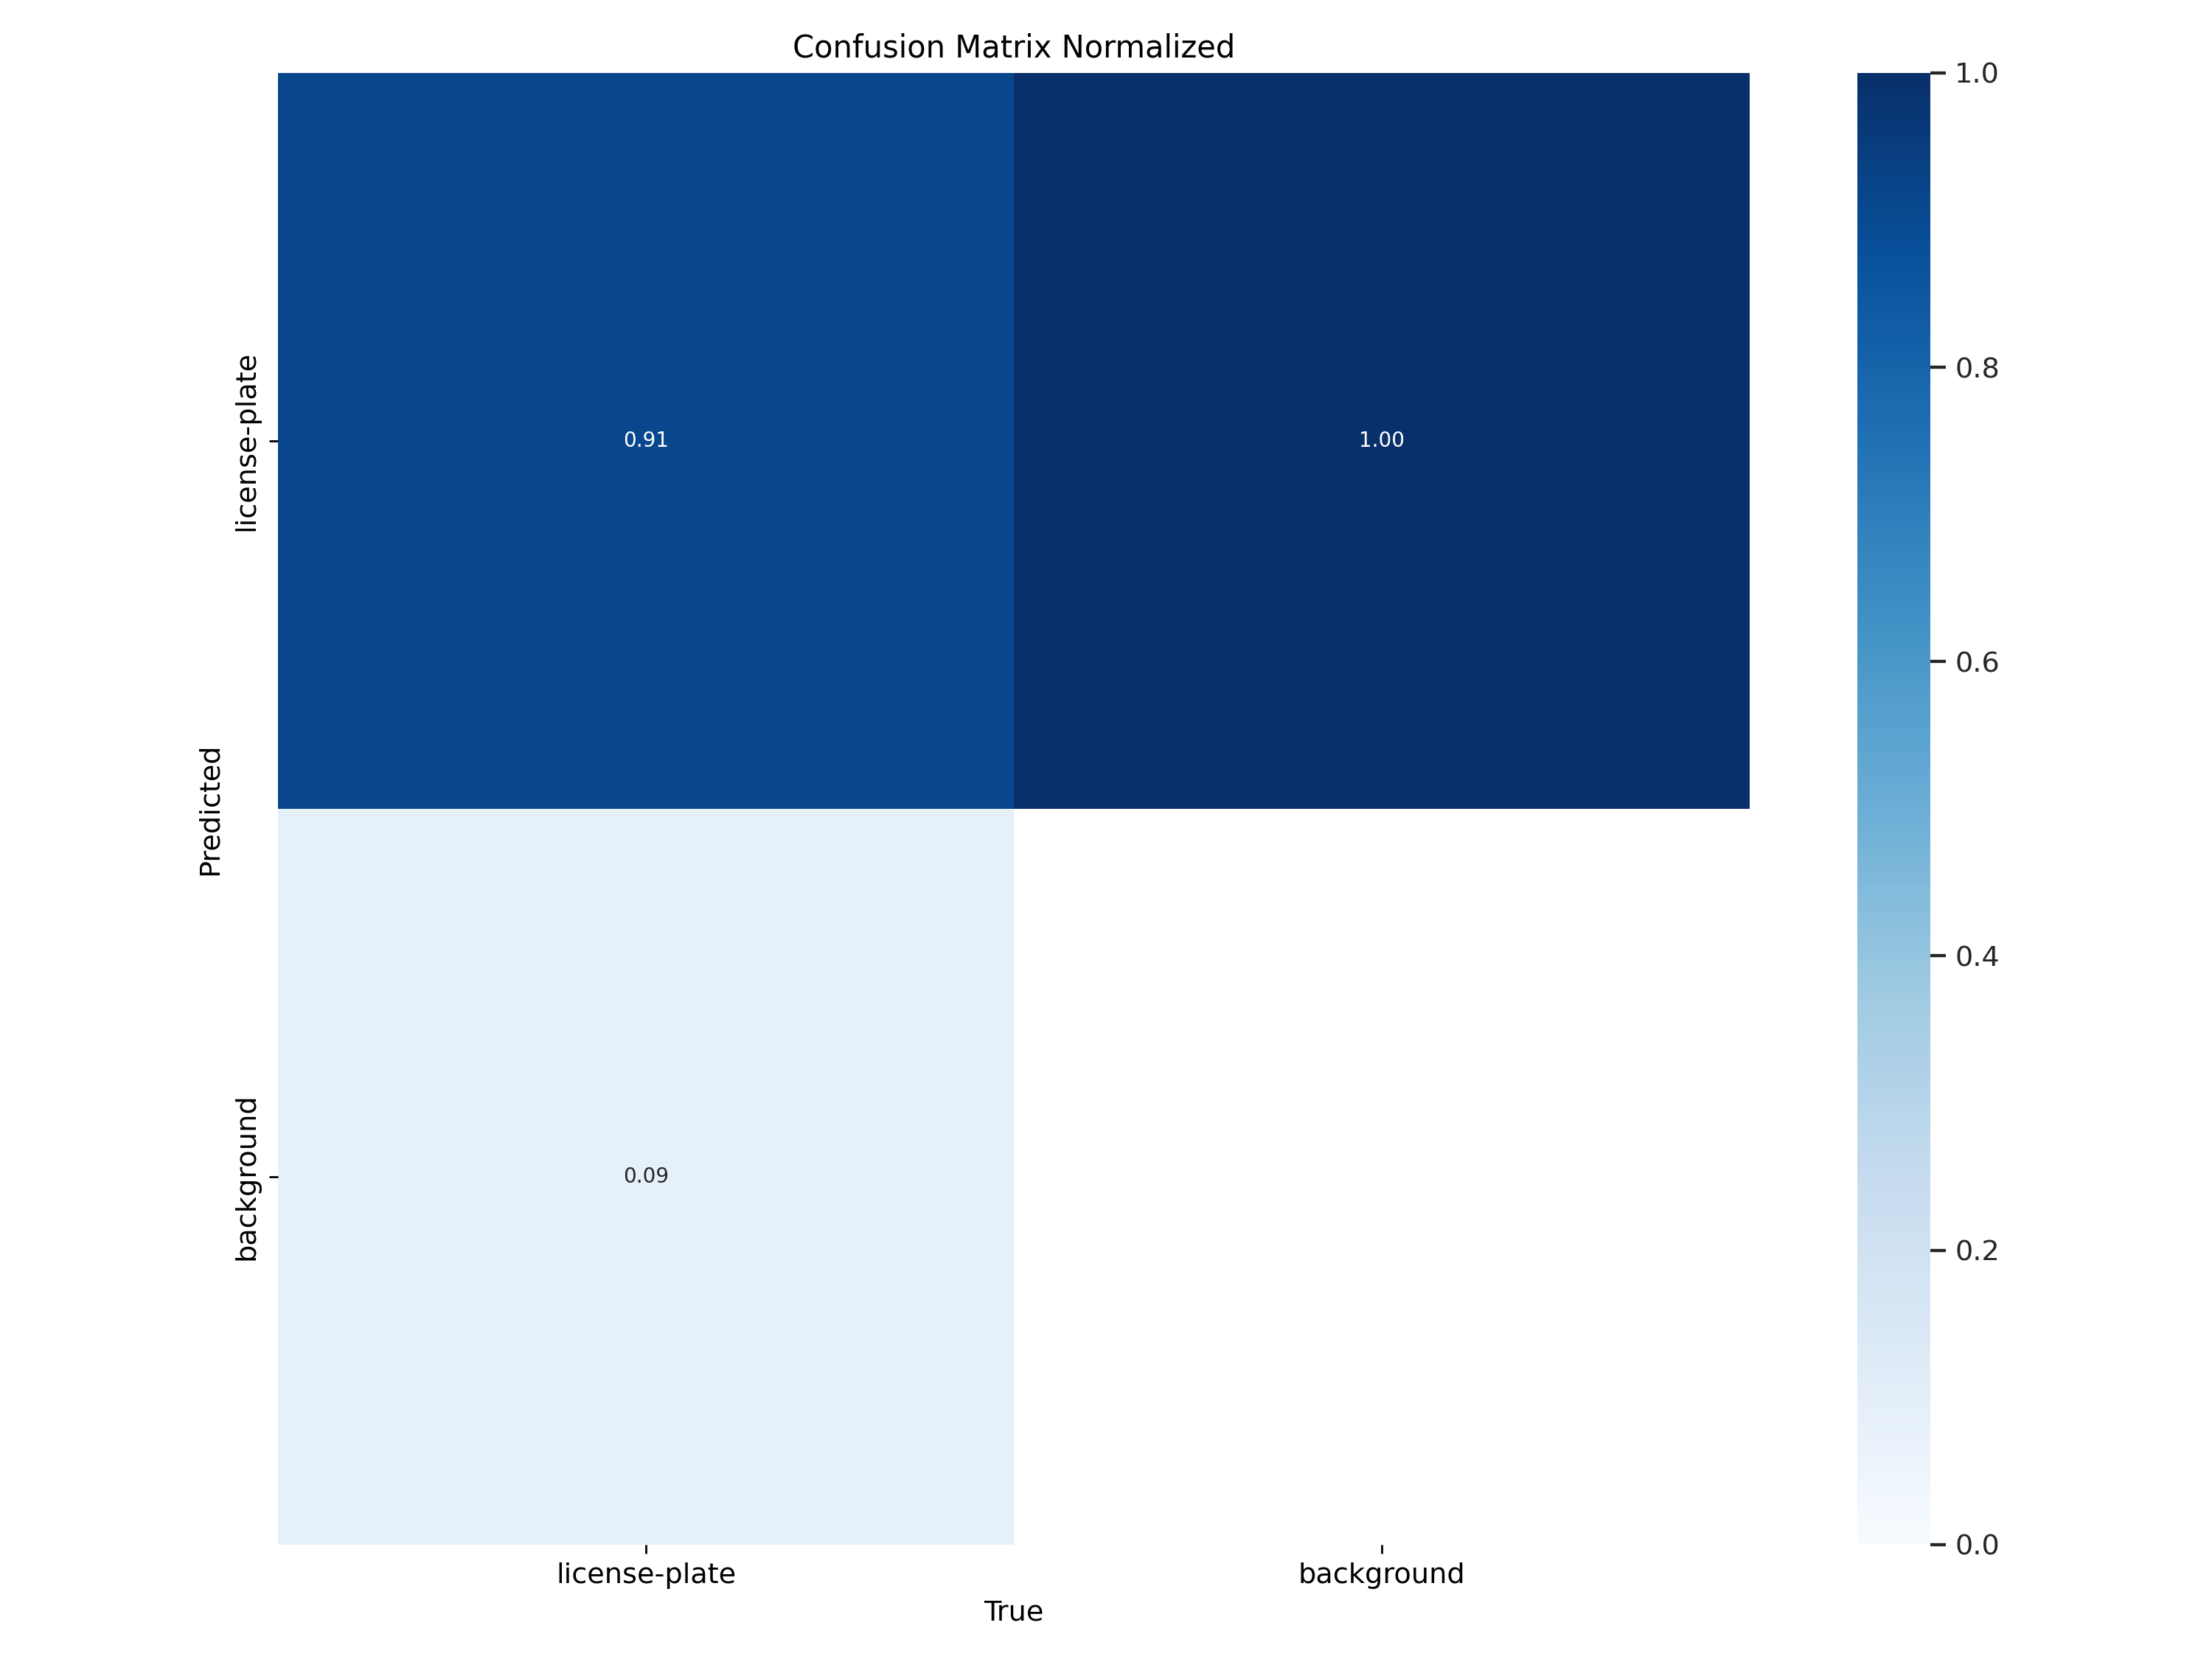

In [20]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train2/confusion_matrix_normalized.png', height=600)

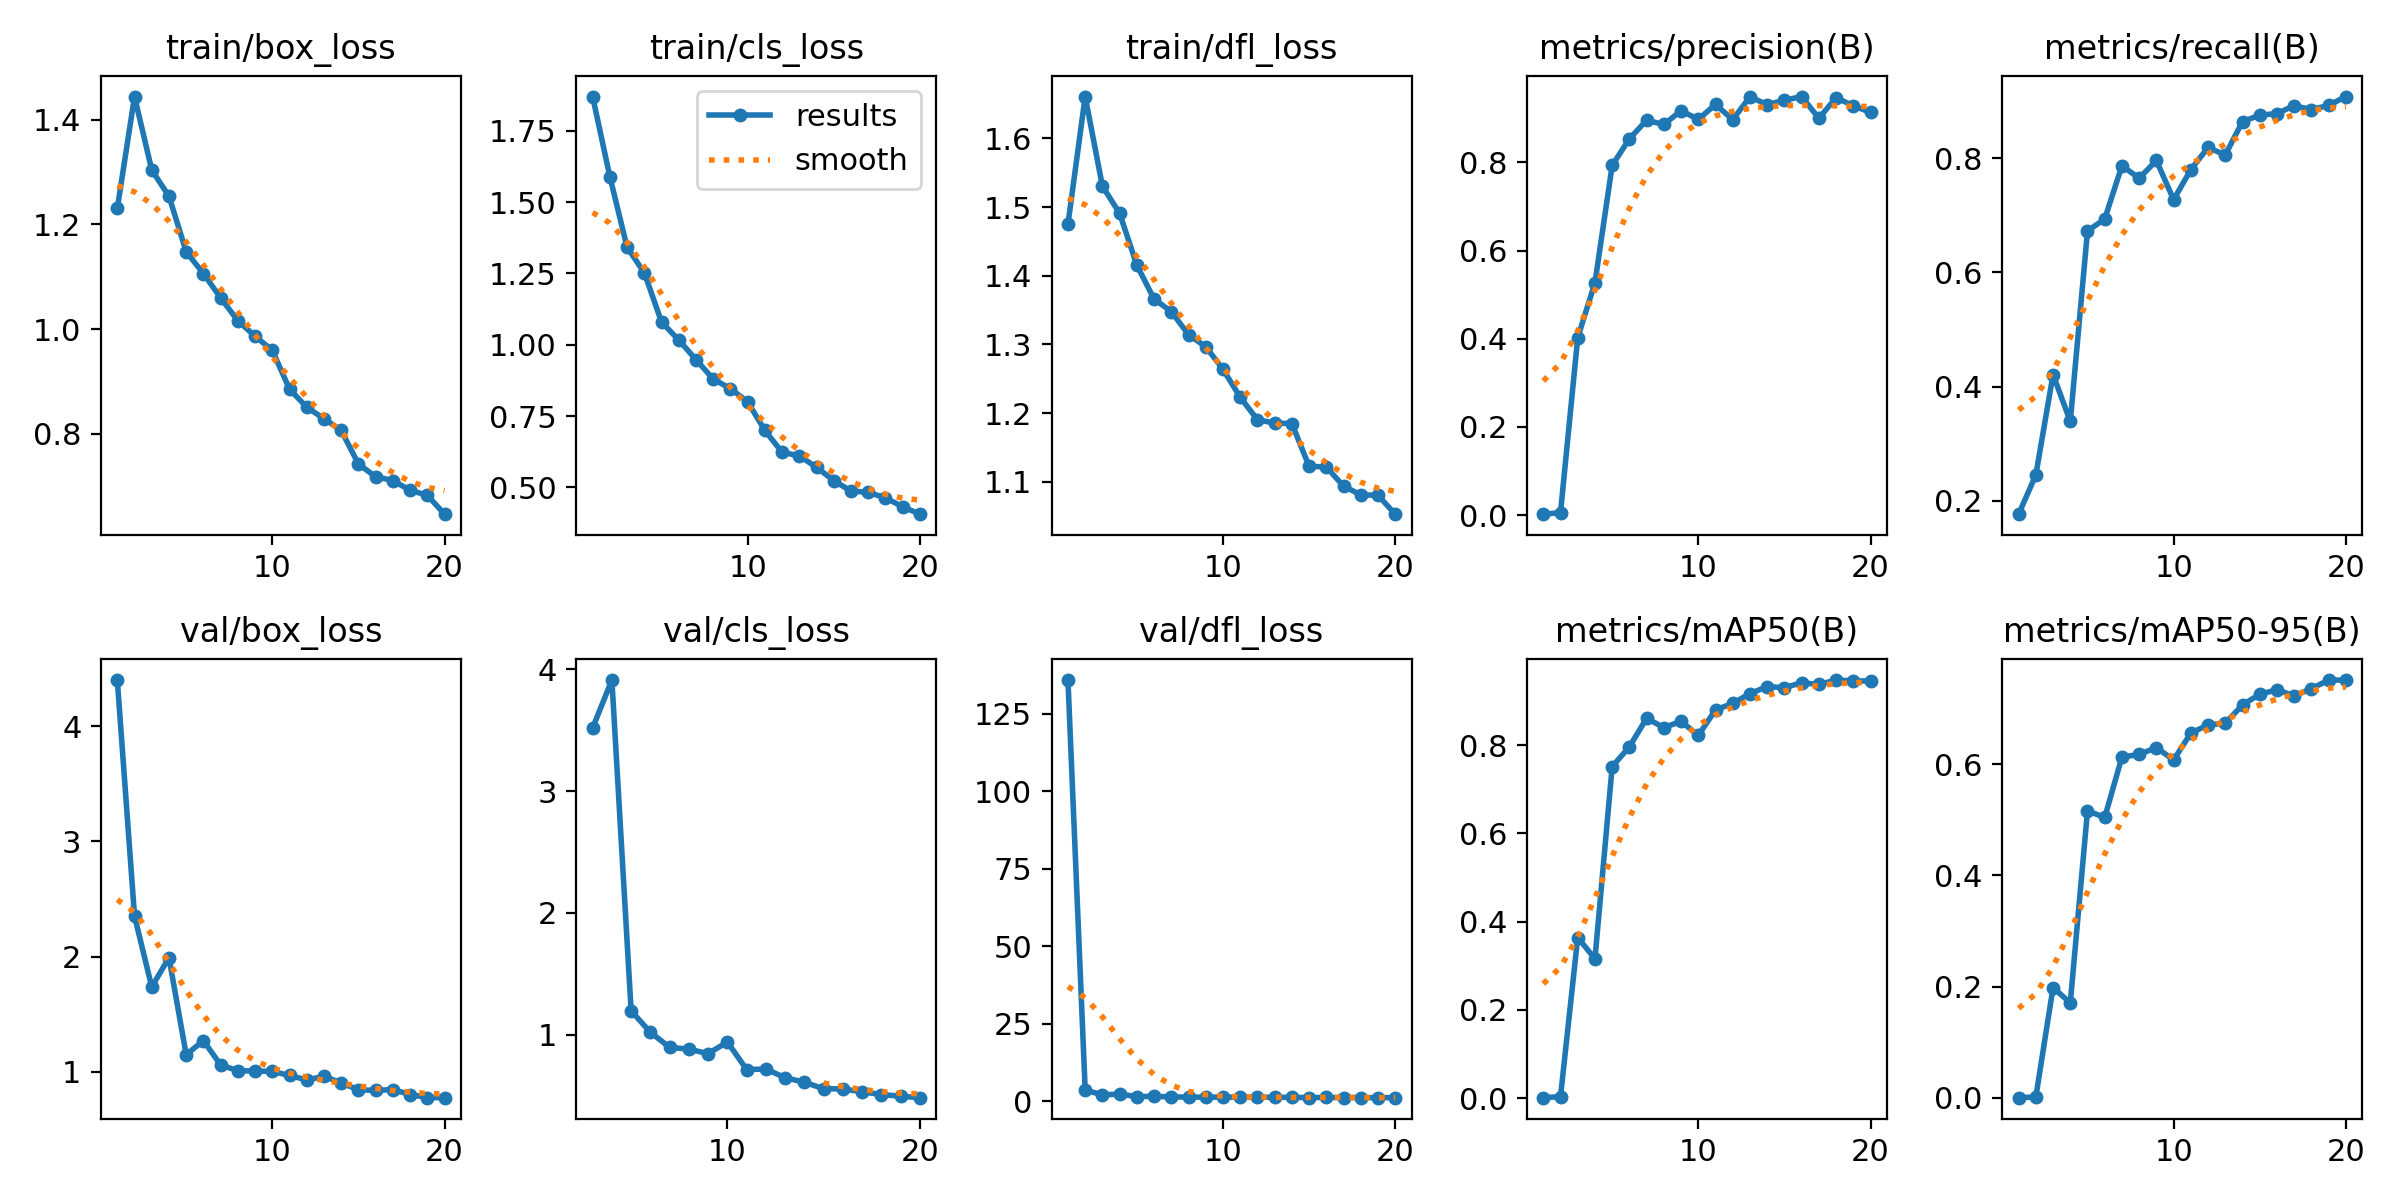

In [21]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train2/results.png', height=600)

In [1]:
from google.colab import files
!cp /content/runs/detect/train/weights/best.pt /content/best_model.pt
files.download('/content/best.pt')

cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory


FileNotFoundError: Cannot find file: /content/best.pt